In [11]:
!pip install torch

python(83378) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 MB 1.3 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 1.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 1.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 2.0 MB/s eta 0:00:00a 0:00:01m


In [13]:
!pip install spacy

python(83402) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 890.5 kB/s eta 0:00:00 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 1.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.5/124.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.4/463.4 kB 364.3 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 1.6 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.2/653.2 kB 1.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 741.1/741.1 kB 1.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 1.7 MB/s eta 0:00:00a 0:00:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 2.8 MB/s

In [17]:
!pip install --force-reinstall typing_extensions

python(83422) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
Using cached typing_extensions-4.15.0-py3-none-any.whl (44 kB)
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.20.0 which is incompatible.


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import re
import torch
from typing import List
import requests
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import spacy
from bs4 import BeautifulSoup

import keras_hub

In [2]:
pd.options.display.max_columns
pd.options.display.max_rows
import os, math
 
# #for visualization
# import matplotlib.pyplot as plt
# import seaborn as sns
# from wordcloud import WordCloud, STOPWORDS
 
# #for text cleaning / preprocessing
# import string, re
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from sklearn.preprocessing import LabelEncoder
 
# #for data analysis and modeling
# from sklearn.model_selection import train_test_split
# from sklearn.utils.class_weight import compute_class_weight
# from sklearn import decomposition
 
import warnings
warnings.filterwarnings('ignore')

# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [4]:
from nltk.corpus import stopwords
sw1 = ["a","a's","able","about","above","according","http","https","accordingly","across","actually","after","afterwards","again","against","ain't","all","allow","allows","almost","alone","along","already","also","although","always","am","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","aside","ask","asking","associated","at","available","away","awfully","b","be","became","because","become","becomes","becoming","been","before","beforehand","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","c","c'mon","c's","came","can","can't","cannot","cant","cause","causes","certain","certainly","changes","clearly","co","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","currently","d","definitely","described","despite","did","didn't","different","do","does","doesn't","doing","don't","done","down","downwards","during","e","each","edu","eg","eight","either","else","elsewhere","enough","entirely","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","f","far","few","fifth","first","five","followed","following","follows","for","former","formerly","forth","four","from","further","furthermore","g","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","h","had","hadn't","happens","hardly","has","hasn't","have","haven't","having","he","he's","hello","help","hence","her","here","here's","hereafter","hereby","herein","hereupon","hers","herself","hi","him","himself","his","hither","hopefully","how","howbeit","however","i","i'd","i'll","i'm","i've","ie","if","ignored","immediate","in","inasmuch","inc","indeed","indicate","indicated","indicates","inner","insofar","instead","into","inward","is","isn't","it","it'd","it'll","it's","its","itself","j","just","k","keep","keeps","kept","know","known","knows","l","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","little","look","looking","looks","ltd","m","mainly","many","may","maybe","me","mean","meanwhile","merely","might","more","moreover","most","mostly","much","must","my","myself","n","name","namely","nd","near","nearly","necessary","need","needs","neither","never","nevertheless","new","next","nine","no","nobody","non","none","noone","nor","normally","not","nothing","novel","now","nowhere","o","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","only","onto","or","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","own","p","particular","particularly","per","perhaps","placed","please","plus","possible","presumably","probably","provides","q","que","quite","qv","r","rather","rd","re","really","reasonably","regarding","regardless","regards","relatively","respectively","right","s","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","she","should","shouldn't","since","six","so","some","somebody","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","t","t's","take","taken","tell","tends","th","than","thank","thanks","thanx","that","that's","thats","the","their","theirs","them","themselves","then","thence","there","there's","thereafter","thereby","therefore","therein","theres","thereupon","these","they","they'd","they'll","they're","they've","think","third","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","to","together","too","took","toward","towards","tried","tries","truly","try","trying","twice","two","u","un","under","unfortunately","unless","unlikely","until","unto","up","upon","us","use","used","useful","uses","using","usually","uucp","v","value","various","very","via","viz","vs","w","want","wants","was","wasn't","way","we","we'd","we'll","we're","we've","welcome","well","went","were","weren't","what","what's","whatever","when","whence","whenever","where","where's","whereafter","whereas","whereby","wherein","whereupon","wherever","whether","which","while","whither","who","who's","whoever","whole","whom","whose","why","will","willing","wish","with","within","without","won't","wonder","would","wouldn't","x","y","yes","yet","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","z","zero"]
sw1 = set(sw1)
sw = stopwords.words("english")
sw = set(sw)
STOPWORDS = set.union(sw1, sw)

In [5]:
def remove_stopwords(text):
# filter out words that are in the stopword list
# also lowercasing text entries
    text = [x.lower() for x in text.split() if x.lower() not in STOPWORDS]
# text is a collection of non-stopwords (in lowercase)
# now join the words with space separator and return them as a string
    return " ".join(text)

In [6]:
def remove_emojis(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [7]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

In [8]:
def remove_URLs(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [9]:
def remove_punctuation(text):
    import string
# replacing the punctuations with no space,
# which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [10]:
path_train = 'train.csv'
data_train = pd.read_csv(path_train)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [11]:
df_train = data_train.copy()
df_train["text"] = df_train["text"].apply(remove_punctuation)
df_train['text'] = df_train['text'].apply(remove_stopwords)
df_train['text'] = df_train['text'].apply(remove_emojis)
df_train['text'] = df_train['text'].apply(remove_html)
df_train['text'] = df_train['text'].apply(remove_URLs)

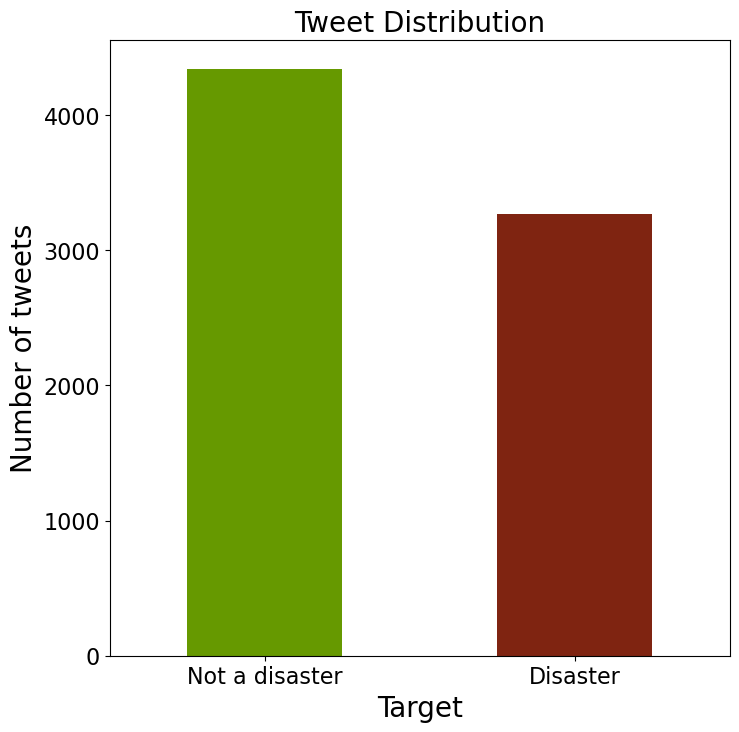

In [12]:
#Visualize the data
fig, ax = plt.subplots(figsize=(8,8))
df_train['target'].value_counts(sort=True).plot(kind='bar', color={'#7F2411','#669900'}, fontsize = 16)
x = ['Not a disaster', 'Disaster']
default_x_ticks = range(len(x))
plt.xticks(default_x_ticks, x, rotation=0, fontsize = 16)
plt.title('Tweet Distribution', fontsize = 20)
plt.xlabel('Target', fontsize = 20)
plt.ylabel('Number of tweets', fontsize = 20)
plt.show()

In [13]:
pp_train = df_train.copy()

In [5]:
# X_train = df_train['text'].values
# y_train = df_train['target'].values

# from sklearn.model_selection import train_test_split
# X_train_, X_val_, y_train_, y_val_ = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

In [17]:
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 1.4 MB/s eta 0:00:0000:0100:01m
  Preparing metadata (setup.py) ... done
  Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (61 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 1.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.0/183.0 kB 3.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 760.6/760.6 kB 1.4 MB/s eta 0:00:00a 0:00:01m
Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl (13.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 1.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 1.3 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 5.2 MB/s eta 0:00:00
  Created wheel for en_core_web_sm: filename=en_core_web_sm-3.7.1-py3-none-any.whl size=12803374 sha256=20eaa40daeaa6a6611c

In [19]:
!pip install --upgrade spacy
!pip install --upgrade spacy-transformers

  Using cached spacy-3.8.11-cp312-cp312-macosx_11_0_arm64.whl.metadata (27 kB)
  Using cached thinc-8.3.10-cp312-cp312-macosx_11_0_arm64.whl.metadata (15 kB)
  Using cached blis-1.3.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (7.5 kB)
Using cached spacy-3.8.11-cp312-cp312-macosx_11_0_arm64.whl (5.7 MB)
Using cached thinc-8.3.10-cp312-cp312-macosx_11_0_arm64.whl (741 kB)
Using cached blis-1.3.3-cp312-cp312-macosx_11_0_arm64.whl (1.2 MB)
  Attempting uninstall: blis
    Found existing installation: blis 0.7.11
    Uninstalling blis-0.7.11:
      Successfully uninstalled blis-0.7.11
  Attempting uninstall: thinc
    Found existing installation: thinc 8.2.5
    Uninstalling thinc-8.2.5:
      Successfully uninstalled thinc-8.2.5
  Attempting uninstall: spacy
    Found existing installation: spacy 3.7.5
    Uninstalling spacy-3.7.5:
      Successfully uninstalled spacy-3.7.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This beha

In [14]:
# Get TF-IDF ranking of words to fill in our `keyword` and `location` datapoints

# Preprocess our text setup
nlp = spacy.load('en_core_web_sm')

def preprocess(txt):
    doc = nlp(txt.lower())
    return ' '.join([token.lemma_ for token in doc if token.is_alpha and not token.is_stop]) # remove stopwords and lemmatize them!

pp_train['text'] = df_train['text'].apply(preprocess)

pp_train['text']

0                    deed reason earthquake allah forgive
1                        forest fire la ronge sask canada
2       resident ask shelter place notify officer evac...
3       people receive wildfire evacuation order calif...
4            photo ruby alaska smoke wildfire pour school
                              ...                        
7608         giant crane hold bridge collapse nearby home
7609    ariaahrary thetawniest control wild fire calif...
7610                                    km volcano hawaii
7611    police investigate ebike collide car portugal ...
7612    late home raze northern california wildfire ab...
Name: text, Length: 7613, dtype: object

In [15]:
# get website

def get_keywords(topic: str) -> List:
    related_words = []
    link = f'https://relatedwords.io/{topic}'

    try:
        response = requests.get(link, timeout=5)
        response.raise_for_status()
    except requests.Timeout:
        print(f'Timeout Error: {e}')
    except requests.RequestException as e:
        print(f'Request failed: {e}')

    # use soup to extract all words!
    soup = BeautifulSoup(response.content, 'html.parser')

    for a in soup.find_all('a'):
        word = a.text.strip().lower()
        if word.isalpha():
            related_words.append(word)

    return [preprocess(word) for word in related_words]


topics = ['disaster', 'terrorism', 'war']
keywords = []

for topic in topics:
    keywords.extend(get_keywords(topic))

keywords = {word for word in keywords if word}

print(sorted(list(keywords))[:40])
print('Size:', len(keywords))

['abb', 'abuse', 'abusive', 'accident', 'accuse', 'act', 'action', 'active', 'activity', 'adventure', 'adversity', 'affect', 'afflict', 'affliction', 'afghanistan', 'aftermath', 'agency', 'agenda', 'aggravation', 'aggression', 'ago', 'aiai', 'aid', 'ail', 'aim', 'algebra', 'algeria', 'alien', 'alir', 'allege', 'ally', 'annihilation', 'ano', 'ant', 'antagonism', 'anti', 'antisemitism', 'antiterrorism', 'antiterrorist', 'antiwar']
Size: 942


In [16]:
# TF-IDF
vector = TfidfVectorizer()
X = vector.fit_transform(pp_train['text']) #identify if keywords placing in
vocab = vector.get_feature_names_out()

loc_words = set()
docs = list(nlp.pipe([f'I am in {w}' for w in vocab]))
for word, doc in zip(vocab, docs):
    if any(ent.label_ == 'GPE' for ent in doc.ents):
        loc_words.add(word)

def get_key(text, r_idx, loc=False):
    og_tokens = set(text.iloc[r_idx].split())
    row = X[r_idx].toarray()[0]
    sorted_idx = row.argsort()[::-1] # take largest
    for idx in sorted_idx:
        can = vocab[idx]
        if not loc and can in keywords and can in og_tokens: # if we want keyword
            return can
        elif loc and can in loc_words and can in og_tokens: # if we want location
            return can
    return 'No Keyword'

pp_train['keyword'] = [get_key(pp_train['text'], i) for i in range(len(pp_train))]
pp_train['location'] = [get_key(pp_train['text'], i, True) for i in range(len(pp_train))]

In [17]:
pp_train

,id,keyword,location,text,target
0,1,earthquake,No Keyword,deed reason earthquake allah forgive,1
1,4,fire,canada,forest fire la ronge sask canada,1
2,5,evacuation,No Keyword,resident ask shelter place notify officer evac...,1
3,6,evacuation,california,people receive wildfire evacuation order calif...,1
4,7,school,alaska,photo ruby alaska smoke wildfire pour school,1
...,...,...,...,...,...
7608,10869,collapse,No Keyword,giant crane hold bridge collapse nearby home,1
7609,10870,state,california,ariaahrary thetawniest control wild fire calif...,1
7610,10871,volcano,No Keyword,km volcano hawaii,1
7611,10872,threaten,portugal,police investigate ebike collide car portugal ...,1


In [26]:
!pip install tensorflow-text

  Using cached tensorflow-2.19.1-cp312-cp312-macosx_12_0_arm64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
Using cached tensorflow-2.19.1-cp312-cp312-macosx_12_0_arm64.whl (252.7 MB)
Using cached tensorboard-2.19.0-py3-none-any.whl (5.5 MB)
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.20.0
    Uninstalling tensorboard-2.20.0:
      Successfully uninstalled tensorboard-2.20.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.20.0
    Uninstalling tensorflow-2.20.0:
      Successfully uninstalled tensorflow-2.20.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.20.1 requires tensorflow<2.21,>=2.20, but you have tensorflow 2.19.1 which is incompatible.


In [18]:
import tensorflow as tf
import tensorflow_text as tft

In [19]:
preprocessor = keras_hub.models.DistilBertPreprocessor.from_preset('distil_bert_base_en_uncased', 
                                                                   sequence_length=128)

classifier = keras_hub.models.DistilBertClassifier.from_preset('distil_bert_base_en_uncased', 
                                                               num_classes=1,
                                                               preprocessor=preprocessor)

classifier.compile(loss=BinaryCrossentropy(from_logits=True), optimizer=Adam(learning_rate=1e-5), metrics=['accuracy'])

classifier.summary()

Preprocessor: "distil_bert_text_classifier_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                                  ┃                                   Config ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ distil_bert_tokenizer (DistilBertTokenizer)                   │                       Vocab size: 30,522 │
└───────────────────────────────────────────────────────────────┴──────────────────────────────────────────┘

Model: "distil_bert_text_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ distil_bert_backbone          │ (None, None, 768)         │      66,362,880 │ padding_mask[0][0],        │
│ (DistilBertBackbone)          │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item (GetItem)            │ (None, 768)               │               0 │ distil_bert_backbone[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pooled_dense (Dense)          │ (None, 768)               │         590,592 │ get_item[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ output_dropout (Dropout)      │ (None, 768)               │               0 │ pooled_dense[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ logits (Dense)                │ (None, 1)                 │             769 │ output_dropout[0][0]       │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 66,954,241 (255.41 MB)

 Trainable params: 66,954,241 (255.41 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
combined_text = ('keyword: ' + pp_train['keyword'] + 
                 ' location: ' + pp_train['location'] + 
                 ' text: ' + pp_train['text'])

# resplit data, this time with our combined text
X_temp, X_test, y_temp, y_test = train_test_split(combined_text, pp_train['target'], test_size=0.15, stratify=pp_train['target'])
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, stratify=y_temp)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

final = classifier.fit(x=X_train.tolist(), y=y_train.astype('float32').values, 
               validation_data=(X_val.tolist(), y_val.astype('float32').values), 
               batch_size=32, epochs=10, callbacks=[early_stop])

Epoch 1/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 12312s 74s/step - accuracy: 0.7130 - loss: 0.5418 - val_accuracy: 0.7918 - val_loss: 0.4761
Epoch 2/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 4616s 28s/step - accuracy: 0.8174 - loss: 0.4241 - val_accuracy: 0.8075 - val_loss: 0.4594
Epoch 3/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 5116s 31s/step - accuracy: 0.8467 - loss: 0.3752 - val_accuracy: 0.8110 - val_loss: 0.4615
Epoch 4/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 3811s 23s/step - accuracy: 0.8703 - loss: 0.3346 - val_accuracy: 0.8145 - val_loss: 0.4751


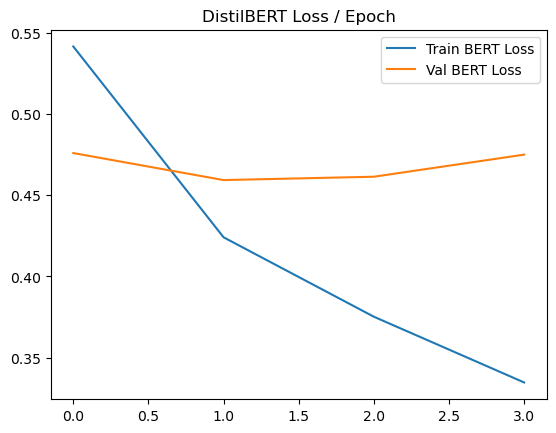

In [21]:
plt.plot(final.history['loss'], label='Train BERT Loss')
plt.plot(final.history['val_loss'], label='Val BERT Loss')
plt.title('DistilBERT Loss / Epoch')
plt.legend()

36/36 ━━━━━━━━━━━━━━━━━━━━ 199s 5s/step


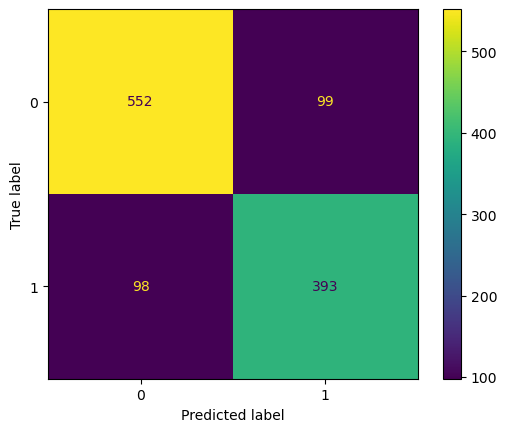

In [22]:
y_pred = classifier.predict(X_test.tolist())
y_pred_lbls = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred_lbls)
ConfusionMatrixDisplay(cm).plot()

In [23]:
df_test = pd.read_csv('test.csv')
df_test["text"] = df_test["text"].apply(remove_punctuation)
df_test['text'] = df_test['text'].apply(remove_stopwords)
df_test['text'] = df_test['text'].apply(remove_emojis)
df_test['text'] = df_test['text'].apply(remove_html)
df_test['text'] = df_test['text'].apply(remove_URLs)
pp_test = df_test.copy()
pp_test['text'] = df_test['text'].apply(preprocess)

# pp_test['text']
# X_test = df_tes['text'].apply(lambda txt: clean_text(txt))
# df_test['target'].value_counts()

# pp_test['keyword'] = [get_key(pp_test['text'], i) for i in range(len(pp_test))]
# pp_test['location'] = [get_key(pp_test['text'], i, True) for i in range(len(pp_test))]


# df_sample = pd.read_csv('sample_submission.csv')
# df_sample["target"] = np.argmax(classifier.predict(X_test), axis=1)
# df_sample.to_csv("df_submission.csv", index=False)

In [24]:
# test['text'] = test['text'].apply(preprocess)

# TF-IDF
X = vector.transform(pp_test['text'])
vocab = vector.get_feature_names_out()

loc_words = set()
docs = list(nlp.pipe([f'I am in {w}' for w in vocab]))
for word, doc in zip(vocab, docs):
    if any(ent.label_ == 'GPE' for ent in doc.ents):
        loc_words.add(word)

pp_test['keyword'] = [get_key(pp_test['text'], i) for i in range(len(pp_test))]
pp_test['location'] = [get_key(pp_test['text'], i, True) for i in range(len(pp_test))]

combined_text_ = ('keyword: ' + pp_test['keyword'] + 
                 ' location: ' + pp_test['location'] + 
                 ' text: ' + pp_test['text'])

submission_ = (classifier.predict(combined_text_) > 0.5).astype(int)

submission_df = pd.DataFrame({
    'id': pp_test['id'],
    'target': submission_.flatten()
})

submission_df.to_csv('submission_1.csv', index=False)

102/102 ━━━━━━━━━━━━━━━━━━━━ 402s 4s/step
